In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score 

## Load Data

In [4]:
train_df = pd.read_csv('/Users/aamirpirani/Desktop/Data_Analysis/Kaggle Competition May 2024/Data/train.csv')

In [5]:
test_df = pd.read_csv('/Users/aamirpirani/Desktop/Data_Analysis/Kaggle Competition May 2024/Data/test.csv')

In [6]:
train_df = train_df.drop('id', axis=1)
test_ids = test_df['id']
test_df = test_df.drop('id', axis=1)

## Exploratory Data Analysis 

In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [8]:
print(train_df.describe())

       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.117957e+06        1.117957e+06     1.117957e+06   1.117957e+06   
mean       4.921450e+00        4.926671e+00     4.955322e+00   4.942240e+00   
std        2.056387e+00        2.093879e+00     2.072186e+00   2.051689e+00   
min        0.000000e+00        0.000000e+00     0.000000e+00   0.000000e+00   
25%        3.000000e+00        3.000000e+00     4.000000e+00   4.000000e+00   
50%        5.000000e+00        5.000000e+00     5.000000e+00   5.000000e+00   
75%        6.000000e+00        6.000000e+00     6.000000e+00   6.000000e+00   
max        1.600000e+01        1.800000e+01     1.600000e+01   1.700000e+01   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean   4.942517e+00   4.934093e+00  4.955878e+00  4.927791e+00   
std    2.083391e+00   2.057742e+00  2.083063e+00  2.065992e+00   
min    0.000000e+00   0.

In [9]:
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [10]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability          

## Feature Distributions

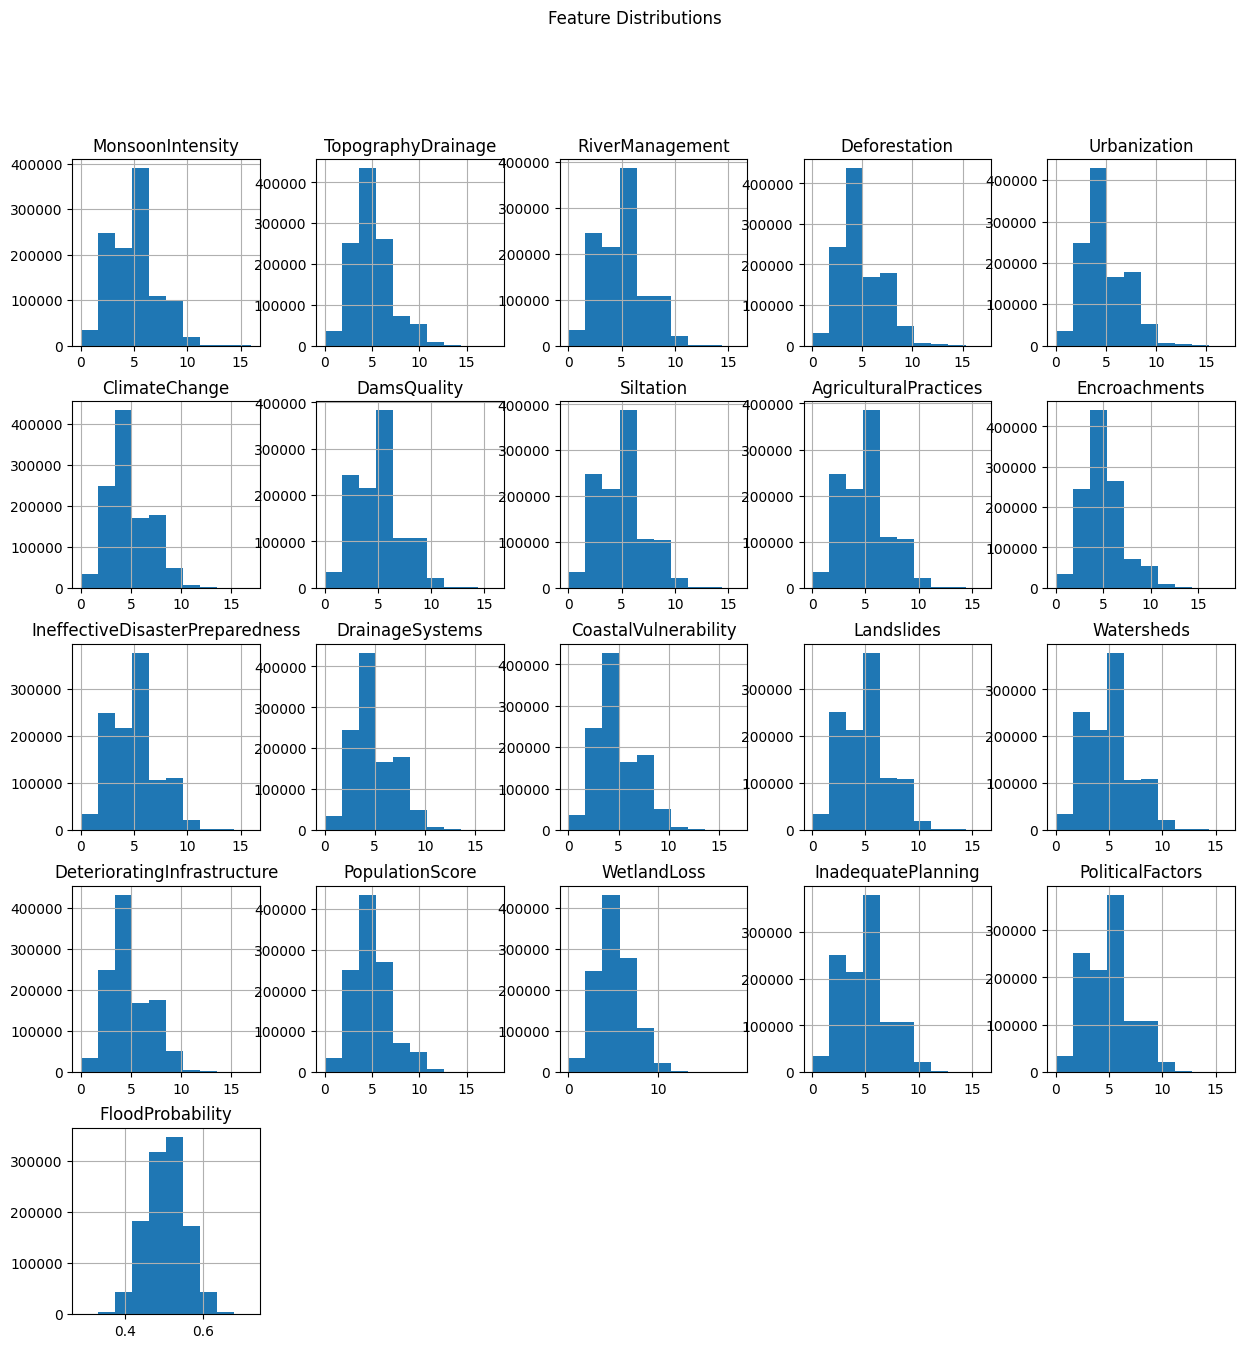

In [11]:
train_df.hist(figsize=(15, 15))
plt.suptitle('Feature Distributions')
plt.show()

## Correlation Matrix

In [12]:
features = [
    'MonsoonIntensity',
    'TopographyDrainage',
    'RiverManagement',
    'Deforestation',
    'Urbanization',
    'ClimateChange',
    'DamsQuality',
    'Siltation',
    'AgriculturalPractices'
]
target = 'FloodProbability'

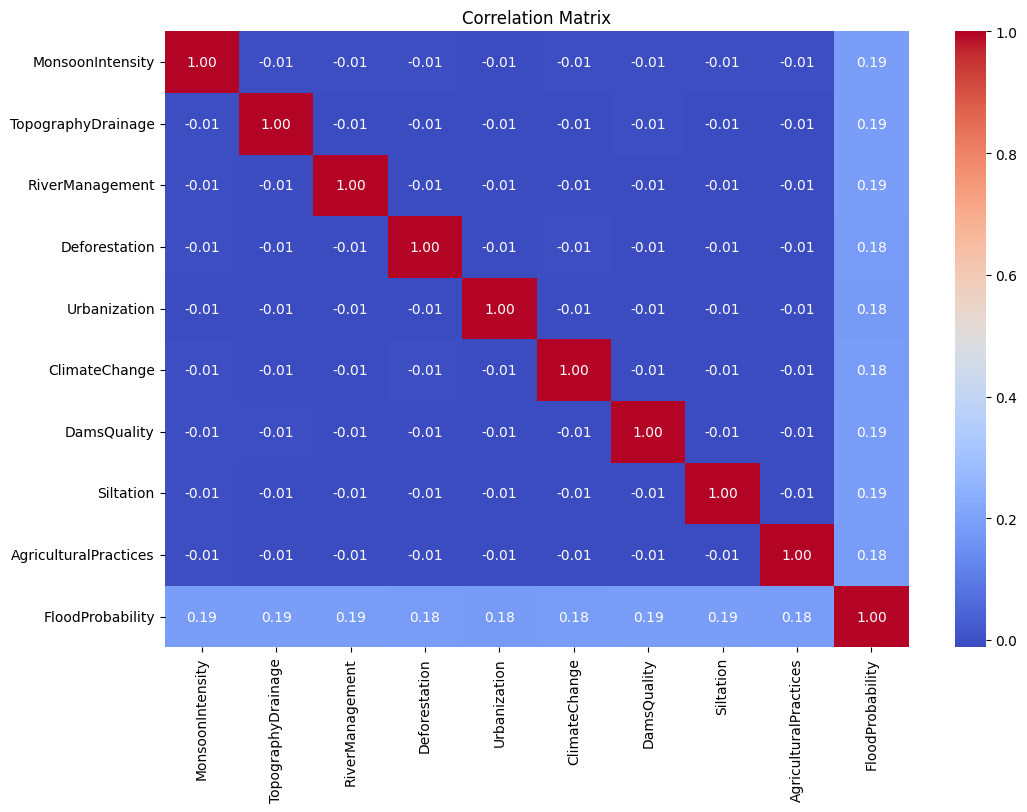

In [13]:
correlation_matrix = train_df[features + [target]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Relationship between Feature & Target

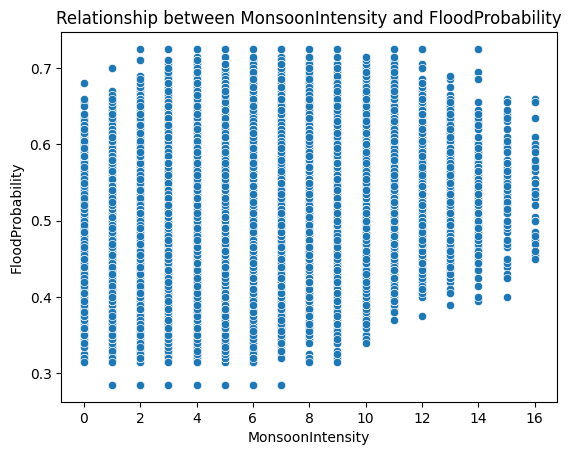

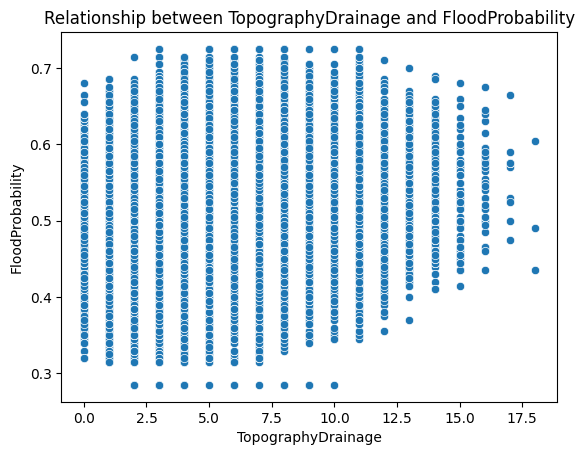

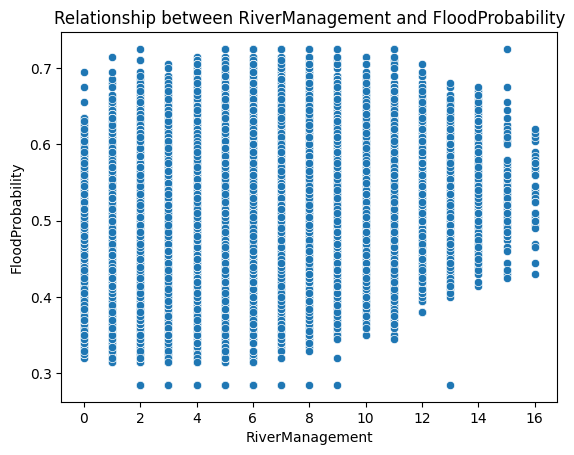

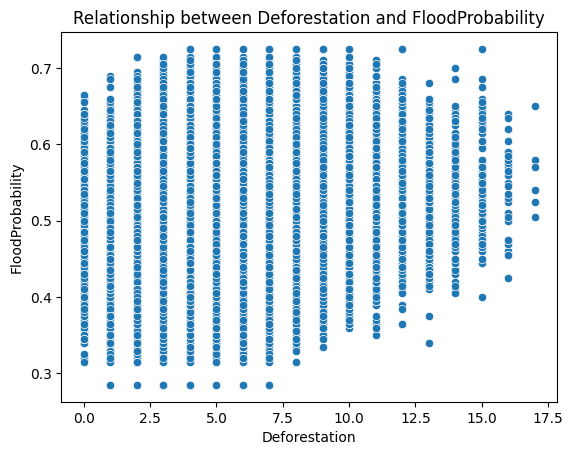

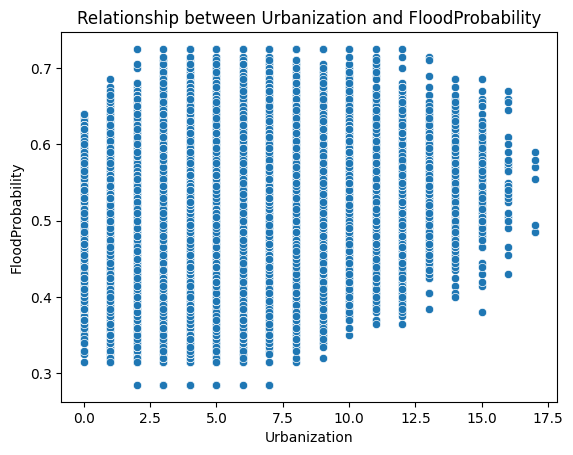

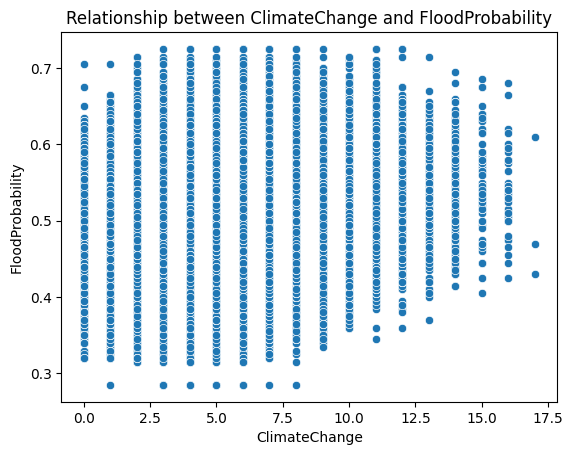

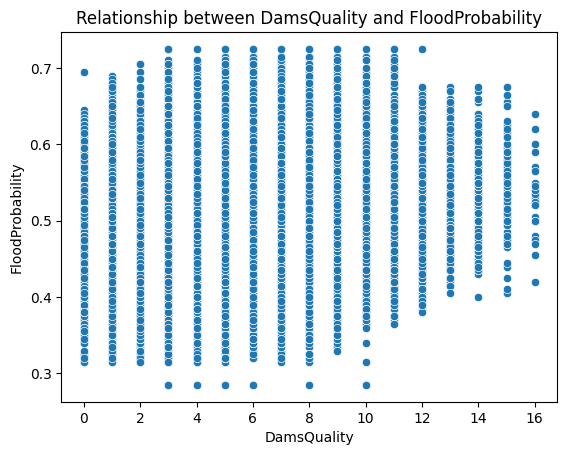

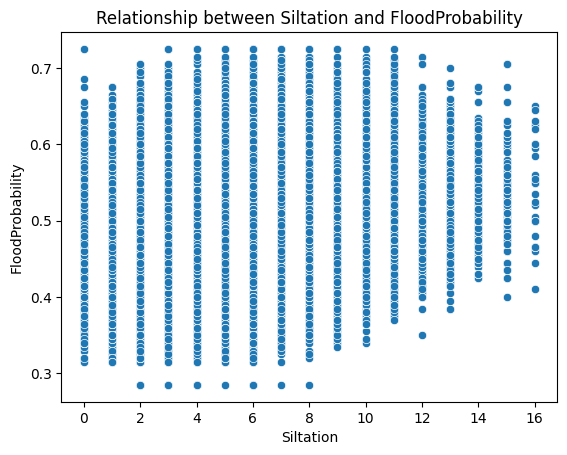

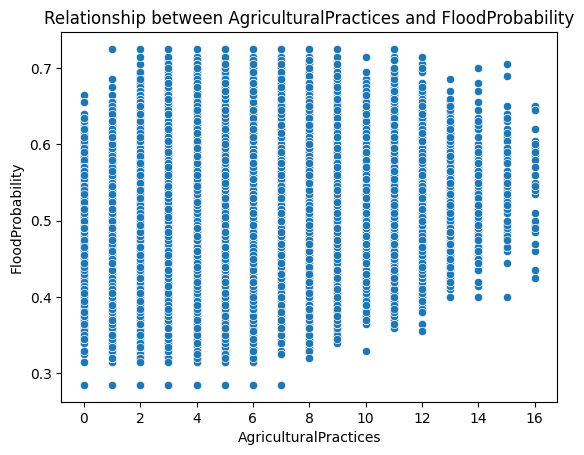

In [14]:
for feature in features:
    plt.figure()
    sns.scatterplot(data=train_df, x=feature, y=target)
    plt.title(f'Relationship between {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

## Feature Engineering 

In [15]:
def feature_engineering(data, ind_cols):
    data['f_sum'] = data[ind_cols].sum(axis=1)
    data['f_avg'] = data[ind_cols].mean(axis=1)
    data['f_std'] = data[ind_cols].std(axis=1)
    return data

train_df = feature_engineering(train_df, features)
test_df = feature_engineering(test_df, features)

In [16]:
X = train_df.drop(target, axis=1)
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection & Training 

In [17]:
models = {
    'Ridge': Ridge()
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', model)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    print(f'{name} CV R2 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Ridge CV R2 Score: 0.8455 ± 0.0004


In [18]:
best_model = Ridge()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', best_model)
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

## Evaluation

In [19]:
y_pred = pipeline.predict(X_val)
print(f'Validation R2 Score: {r2_score(y_val, y_pred):.4f}')

Validation R2 Score: 0.8454


## Prediction

In [21]:
test_pred = pipeline.predict(test_df)

## Submission File

In [34]:
import os
import tempfile
import shutil

In [25]:
submission = pd.DataFrame()
submission['id'] = test_ids
submission['FloodProbability'] = test_pred

In [27]:
print(submission.head())

        id  FloodProbability
0  1117957          0.574556
1  1117958          0.455791
2  1117959          0.454575
3  1117960          0.466011
4  1117961          0.466716
